In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
songs = pd.read_csv('data/ma_songs_lyrics.csv', index_col=0)

It can be observed that songs with "(lyrics not available)" or "(Instrumental)" are the ones without lyrics, so these should be dropped first. Then, to simplify the analysis, all columns with lyrics containing characters outside of basic ASCII will be dropped. This would eliminate most non-English lyrics, but could also affect English lyrics with diacritic marks.



In [3]:
songs = songs[  (songs['lyrics'] != '(lyrics not available)')
              & (songs['lyrics'] != '(Instrumental)')
              & ~songs['lyrics'].str.contains('[^\x00-\x7f]')]
songs = songs.reset_index(drop='True')
songs.head()

,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
0,https://www.metal-archives.com/bands/Greed/354...,Greed,Belial / Infest,Demo,Belial,5670454,Aggrandisement\r\n\r\nMaster of earth\r\nWeake...
1,https://www.metal-archives.com/bands/Greed/354...,Greed,Belial / Infest,Demo,Infest,5670455,Infest\r\n\r\nCorrupt the\r\nmasses\r\nInfest\...
2,https://www.metal-archives.com/bands/Greed/354...,Greed,The Purge of Earth,EP,Belial,5668770,Aggrandisement\r\n\r\nMaster of earth. Fall to...
3,https://www.metal-archives.com/bands/Greed/354...,Greed,The Purge of Earth,EP,Infest,5668769,Infest\r\nCorrupt the masses\r\n\r\nSuffering\...
4,https://www.metal-archives.com/bands/Blind_Gre...,Blind Greed,The Almighty Dollar,Full-length,Blind Greed,1397957,"You know I've heard lots of stories, about how..."


In [4]:
bands = pd.read_csv('data/ma_bands_data.csv', index_col=0)
songs = pd.merge(bands, songs, left_on='name', right_on='band_name')
songs.head()

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
0,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Ace of Spades (Motörhead cover),803073,"If you like to gamble, I tell you I'm your man..."
1,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Bark at the Moon (Ozzy Osbourne cover),803063,SCREAMS BREAK THE SILENCE \r\nWAKING FROM THE ...
2,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Crazy Train (Ozzy Osbourne cover),803071,"All aboard, hah hah \r\n\r\nCrazy, but that's ..."
3,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Don't Talk to Strangers (Dio cover),803068,Don't talk to strangers \r\nMmmmh \r\n\r\nDon'...
4,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Freewheel Burning (Judas Priest cover),803070,Fast and furious \r\nWe ride the universe \r\n...


In [5]:
words = songs['lyrics'].str.lower().str.findall("[a-z][a-z'-]*").explode()
words

0             if
0            you
0           like
0             to
0         gamble
           ...  
799763     there
799763     where
799763       she
799763      came
799763      from
Name: lyrics, Length: 116588831, dtype: object

In [6]:
word_counts = words.value_counts()
word_counts.nlargest(40)

the      7088904
of       3139259
to       2805947
i        2301279
and      2265447
you      2172934
in       1958355
a        1869126
my       1571038
your     1463361
is       1345466
me       1020273
for       992555
all       800951
will      782036
we        739674
this      703540
it        699871
on        692145
no        664538
with      661200
are       622261
that      621086
be        600365
from      589001
life      466358
now       454355
by        448323
our       425860
as        421711
they      408760
so        408685
but       399070
time      396802
i'm       388914
see       379264
what      377149
one       366437
death     337839
it's      333677
Name: lyrics, dtype: int64

In [8]:
from sklearn.feature_extraction import _stop_words
nontriv = pd.Series(filter(lambda x: x not in _stop_words.ENGLISH_STOP_WORDS, words))
nontriv

0               if
1              you
2             like
3               to
4           gamble
             ...  
96904971        to
96904972     there
96904973     where
96904974       she
96904975      came
Length: 96904976, dtype: object

In [9]:
nontriv_counts = nontriv.value_counts()
nontriv_counts.nlargest(40)

the        7088904
of         3139259
to         2805947
you        2172934
in         1958355
my         1571038
your       1463361
me         1020273
we          739674
this        703540
it          699871
on          692145
no          664538
with        661200
that        621086
life        466358
now         454355
our         425860
they        408760
so          408685
time        396802
see         379264
what        377149
one         366437
death       337839
their       322104
never       302757
out         296447
when        287792
blood       284949
world       284407
like        280896
his         274853
through     273003
into        272486
just        270439
eyes        269218
know        253830
night       251771
die         237741
dtype: int64

In [10]:

# genre, theme, lyrics
gtl = pd.DataFrame()
gtl['genre'] = songs['genre'].str.lower().str.findall("[a-z][a-z-/\s]*[a-z]")
gtl['theme'] = songs['theme'].str.lower().str.findall("[a-z][a-z-/\s]*[a-z]")
gtl['lyrics'] = songs['lyrics'].str.lower().str.findall("[a-z][a-z'-]*")

In [12]:
gtl['lyrics'] = gtl['lyrics'].apply(lambda x: dict(pd.Series(x, dtype='object').value_counts()))

In [28]:
gtl.head()

,genre,theme,lyrics
0,[heavy/power metal],"[occult, fantasy, human issues]","{'the': 15, 'you': 9, 'i': 7, 'to': 5, 'and': ..."
1,[heavy/power metal],"[occult, fantasy, human issues]","{'in': 8, 'the': 7, 'and': 6, 'he's': 5, 'him'..."
2,[heavy/power metal],"[occult, fantasy, human issues]","{'to': 8, 'the': 7, 'a': 6, 'crazy': 6, 'i'm':..."
3,[heavy/power metal],"[occult, fantasy, human issues]","{'don't': 14, 'you': 12, 'to': 8, 'cause': 7, ..."
4,[heavy/power metal],"[occult, fantasy, human issues]","{'burning': 12, 'freewheel': 12, 'the': 10, 't..."


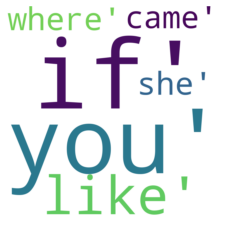

In [35]:
# Word frequency nephogram 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
string=str(nontriv.values)
# Draw the word cloud picture of the movie nephogram
wordcloud = WordCloud(background_color='white',
                      max_words=1000, # Maximum words displayed
                      width=1000,
                      height=1000).generate(string)
#  # Generate word cloud and show  
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
# explode is performed in the generic column
gtl_genre = gtl.explode('genre')

In [42]:
# explode is performed in the theme column
gtl_genre_theme= gtl_genre.explode('theme')
# Up to 20 themes
gtl_genre_theme["theme"].value_counts()[1:20]

war                  75224
life                 59769
darkness             54427
society              52848
fantasy              51161
satanism             44682
violence             44552
gore                 39415
politics             38591
love                 37361
early                36534
occultism            31507
later                30198
anti-christianity    28943
hate                 27778
horror               26536
evil                 26491
nature               26051
metal                25313
Name: theme, dtype: int64

In [43]:
# Up to 20 genre

gtl_genre_theme["genre"].value_counts()[1:20]

death metal               201519
early                     164376
later                     163920
thrash metal              163499
heavy metal               118787
melodic death metal        54029
death/thrash metal         51982
black/death metal          45805
heavy/power metal          45205
brutal death metal         40082
power metal                39422
death metal/grindcore      30280
progressive metal          26816
black/thrash metal         25200
heavy metal/hard rock      24336
thrash/death metal         22243
doom metal                 16939
thrash metal/crossover     16677
gothic metal               15713
Name: genre, dtype: int64

In [44]:
gtl_genre_theme.head() 

,genre,theme,lyrics
0,heavy/power metal,occult,"{'the': 15, 'you': 9, 'i': 7, 'to': 5, 'and': ..."
0,heavy/power metal,fantasy,"{'the': 15, 'you': 9, 'i': 7, 'to': 5, 'and': ..."
0,heavy/power metal,human issues,"{'the': 15, 'you': 9, 'i': 7, 'to': 5, 'and': ..."
1,heavy/power metal,occult,"{'in': 8, 'the': 7, 'and': 6, 'he's': 5, 'him'..."
1,heavy/power metal,fantasy,"{'in': 8, 'the': 7, 'and': 6, 'he's': 5, 'him'..."


In [53]:
# For  genre  death metal   theme   war                       

In [65]:
# Provide genre and theme to draw word cloud map
def  plot_word(genre,theme):
    # Filtering operation
    df =  gtl_genre_theme[(gtl_genre_theme["genre"] == genre) & (gtl_genre_theme["theme"] == theme)]
    from itertools import chain
    df.index = range(len(df))
    d = {}
#     print(len(df))
    for i in range(len(df)):
        # Merge dictionaries 
        d2 = gtl_genre_black_metal["lyrics"][i]
        d = dict(chain(d.items(), d2.items()))
    # plot
    wc = WordCloud(
    max_words=10,  # Maximum words displayed
    background_color="white",  # Set the background to white, default to black
    width = 1500,  
    height= 960,  
    margin= 10  
    )
    wc.generate_from_frequencies(d)  # Generate word cloud from dictionary
    plt.imshow(wc)  
    plt.axis('off')  
    plt.show()  


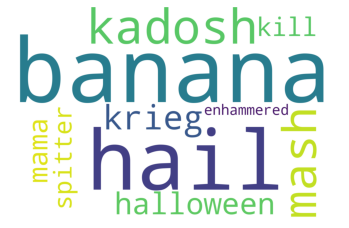

In [52]:
plot_word("death metal","war")

genre:  	 death metal
theme:  	war


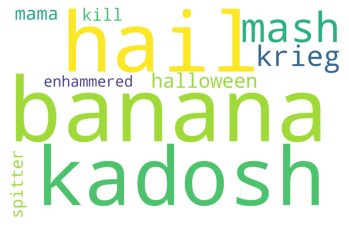

-----------------------
genre:  	 death metal
theme:  	life


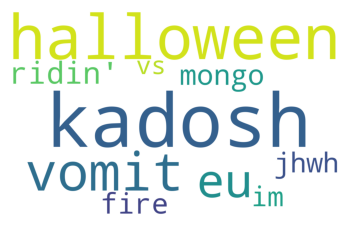

-----------------------
genre:  	 early
theme:  	war


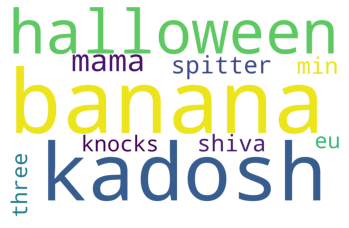

-----------------------
genre:  	 early
theme:  	life


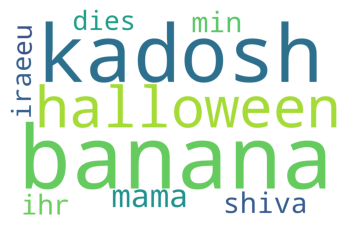

-----------------------


In [66]:
# Draw the word cloud map of different genre and theme
genres =list( gtl_genre_theme["genre"].value_counts()[1:3].index)
themes = list(gtl_genre_theme["theme"].value_counts()[1:3].index)
for i in genres:
    for j in themes:
        print("genre:  \t " + str(i) + "\ntheme:  \t" + str(j))
        plot_word(i,j)
        print("-----------------------")

In [98]:
# Number of bands in different periods“

In [94]:
songs["date"] = songs["date"].astype(str)
# Filter irrelevant characters
songs = songs[songs["date"] != "-9223372036854775808"]

In [95]:
# Convert time series
songs["date"]  = pd.to_datetime(songs["date"],format='%Y')


<AxesSubplot:title={'center':'Number of bands in different periods'}, xlabel='date'>

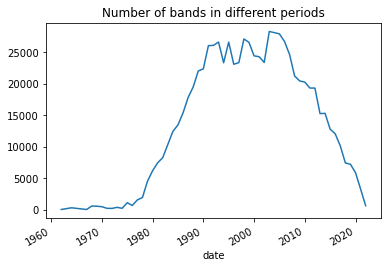

In [97]:
# Number of bands in different periods
songs.groupby(["date"])["name"].count().plot(title = "Number of bands in different periods")

<AxesSubplot:>

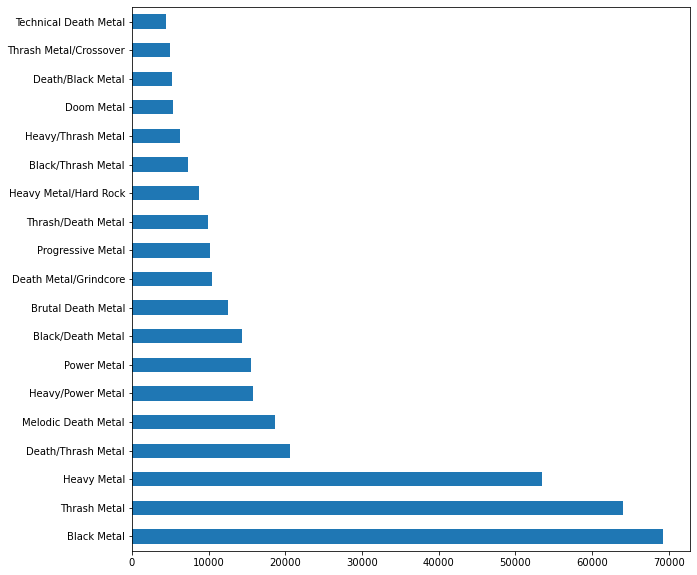

In [108]:
# Number of bands in different genre in  top 20
songs["genre"].value_counts()[1:20].plot(kind = "barh",figsize = (10,10))